Linear Regression in Tensorflow

we’re going to import the dependencies:

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import time

batch_size = 32
learning_rate = 0.003
n_epoches = 6000

Read the data

In [12]:
data = pd.read_csv('seismic-bumps_csv.csv')

dataset = data.copy()
dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,Class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


Splitting the data into train and test dataframes

In [13]:
train_d = dataset.sample(frac = 0.7, random_state = 101)
test_d = dataset.drop(train_d.index)

Converting train and test dataframes to matrices to create datasets 

In [14]:
train_d = train_d.astype('float32').as_matrix()
test_d = test_d.astype('float32').as_matrix()

/home/chi/anaconda3/envs/tfkerEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/chi/anaconda3/envs/tfkerEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Creating dataset

In [15]:
train_dset = tf.data.Dataset.from_tensor_slices((train_d[:, 0], train_d[:, 1]))
test_dset = tf.data.Dataset.from_tensor_slices((test_d[:, 0], test_d[:, 1]))

Combining consecutive elements of the train dataset into batches

In [16]:
train_dset = train_dset.batch(batch_size)

Creating an(initialized) iterator for enumerating the elements of the dataset with the given structure

In [17]:
iterator = tf.data.Iterator.from_structure(train_dset.output_types,
                                          train_dset.output_shapes)

train_init = iterator.make_initializer(train_dset)

get_next( returns a nested structure of tf.Tensor's containing the next element)

In [18]:
X, Y = iterator.get_next()

In [19]:
def R_squared(y, y_pred):
    
    '''
    R_squared computes the coefficient of determination. It's a measure of how well the 
    observed outcomes are replicated by the model
    '''
    
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    
    r2 = tf.subtract(1.0, tf.div(residual, total))
    
    return r2
    
    
    
# Model

#w = tf.Variable(tf.truncated_normal((1,), mean=0, stddev=0.1, seed=123), name='Weight')

w = tf.Variable(tf.truncated_normal((1,), mean = 0, stddev = 0.1, seed = 123),
                name = 'Weight')

b = tf.Variable(tf.constant(0, 1), name = 'Bias')
y_pred = tf.multiply(w, X) + b

# Cost function

loss = tf.reduce_mean(tf.square(Y - y_pred), name = 'Loss')

#training

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

start = time.time()

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for epoch in range(n_epoches):
    sess.run(train_init)
    
    try:
        #Loop until all elements have been consumed
        while True:
            sess.run(optimizer)
            
    except tf.errors.OutOfRangeError:
        
        pass
    
    
end = time.time()


w_curr, b_curr = sess.run([w, b])

y_pred_train = w_curr * train_d[:, 0] + b_curr
y_pred_test = w_curr * test_d[:, 0] + b_curr

r2_train = R_squared(train_d[:, 1], y_pred_train)
r2_test = R_squared(test_d[:, 1], y_pred_test)


In [20]:
print('R^2_train:', sess.run(r2_train))
print('R^2_test:', sess.run(r2_test))
print('elapsed time:', end - start)
sess.close()

R^2_train: 0.9894986
R^2_test: 0.9865388
elapsed time: 25.499895334243774


<function matplotlib.pyplot.legend(*args, **kwargs)>

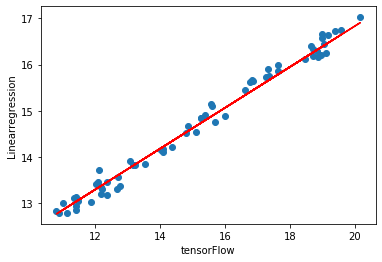

In [21]:
plt.scatter(test_d[:, 0], test_d[:, 1], label = 'Real Data')
plt.plot(test_d[:, 0], y_pred_test, 'r', label = 'Predicted Data')

plt.xlabel('tensorFlow')
plt.ylabel('Linearregression')
plt.savefig('tensorflow')

plt.legend